## 컨볼루션 신경망(CNN)

* MNIST가 가지는 이미지는 높이 28, 너비 28 픽셀로 총 784 픽셀(28*28). 이 픽셀 값은 0에서 255 사이의 정수.  
* train 데이터의 맨 앞 열 이미지에 있는 숫자를 나타내고 나머지 784개의 열은 이미지가 갖고 있는 784개의 픽셀을 의미
* 따라서 label은 0 ~ 9의 값을 갖고, 나머지 784개의 열은 0 ~ 255 값을  갖는다.

### 1. 이미지를 인식하는 원리

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


* 케라스의 MNIST 데이터는 총 70,000개의 이미지 중 60,000개를 학습용
으로, 10,000개를 테스트용으로 미리 구분해 놓고 있음
* X_train, y_train, X_test, y_test은 각각 60000x784, 60000x1, 10000x784, 10000x1의 크기로 각각이 1차원 배열로 되어 있다.

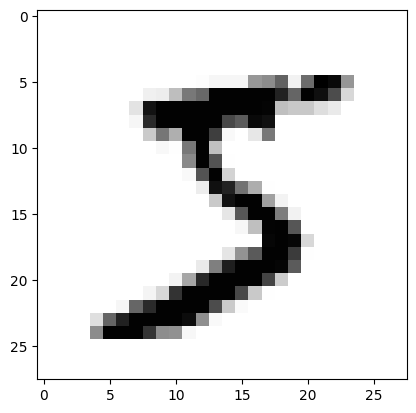

In [3]:
# 첫번째 이미지 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

* 이미지는 가로 28 × 세로 28 = 총 784개의 픽셀로 이루어져 있음
* 각 픽셀은 밝기 정도에 따라 0부터 255까지 의 등급을 매김
* 흰색 배경이 0이라면 글씨가 들어간 곳은 1~255까지 숫자 중 하나로 채
워져 긴 행렬로 이루어진 하나의 집합으로 변환됨

In [4]:
# 이미지가 인식되는 원리
# X_train은 학습 데이터로, 각 원소는 이미지를 나타내는 픽셀들로 구성되어 있음.
for x in X_train[0]: # X_train의 첫번째 이미지에서 각 픽셀을 순회하는 루프 시작
  for i in x: # x는 이미지의 한 행을 나타냄 -> 한 행의 각 픽셀 값을 순회하는 루프 시작
    sys.stdout.write("%-3s" % i)
    # sys.stdout.write : 텍스트를 표준 출력
    # "%-3s" % i : i 값을 문자열로 변환. 그 값을 3칸의 공간을 가진 형태로 출력
  sys.stdout.write('\n') # 행의 끝에 도달했을 때, 줄을 바꿔서 다음 행으로 넘어가기 위해 개행(newline) 문자를 출력하는 코드

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

데이터 전처리  
 - 이미지는 다시 숫자의 집합으로 바뀌어 학습셋으로 사용됨
 - 28 * 28 = 784 개의 속성을 이용해 0 ~ 9 까지 10개의 클래스 중 하나를 맞히는 문제가 됨
  
 - 주어진 가로 28, 세로 28의 2차원  배열을 784개의 1차원 배열로 바꿔 주어야 함.
 (딥러닝 모델은 일반적으로 이미지를 2차원 형태로 입력으로 받도록 설계)   
  -> reshape함수 사용. reshape(총 샘플 수, 1차원 속성의 수)  
 - 총 샘플 수는 X_train.shape[0] 이용. 1차원 속성의 수는 784개
 - 일반적으로 딥러닝 모델은 입력 데이터의 스케일을 0과 1 사이로 맞추는 것이 권장
 - x_train, x_test에 255를 나누는 이유는 사진을 읽어오면 컬러 기준으로 (R, G, B)로 최대 (255, 255, 255) 형태로 가져오는데 여기에 255를 나눠 0~1의 값을 가지게 만들어
데이터의 분산의 정도를 바꾸는, 즉 데이터 정규화 과정을 거치게 하기 위해  

https://thebook.io/080244/0219/

In [5]:
# 차원 변환 과정 (2차원 배열로 변경 + 정규화)
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255


X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
# 첫번째 이미지의 클래스 값 확인
print("class : %d" % (y_train[0]))

class : 5


- to_categorical 함수는 수치형 데이터를 범주형 데이터로 만들어 주는 함수
- to_categorical(클래스, 클래스의 개수)의 형식
- to_categorical(y_train, 10) : 0 부터 9까지의 숫자이므로 클래스 개수는 10개

In [7]:
# y의 바이너리화 과정
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 2. 딥러닝 기본 프레임 만들기

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후 테스트셋과 학습셋으로 분리
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64')/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


모델 구조 설정  
  - input_dim=784 : 속성(feature) 데이터 수와 같게
  - relu : 0보다 작은 값이 입력되면 0을 반환하고, 0보다 큰 값이 입력되면 그 값을 그대로 반환하는 함수
  - softmax : 입력된 여러 값을 0~1 사이의 값으로 모두 정규화하며 출력하는 함수

In [9]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모델 실행 환경을 설정
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [11]:
# 모델 최적화를 위한 설정
modelpath='./MINIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

모델 실행  
* batch_size : 모델이 한 번에 학습하는 데이터의 수
* epochs=30 : 모든 데이터를 30번 반복
* verbose : 케라스 fit 함수의 결괏값을 출력하는 방법을 의미  
  * 0 : 아무 표시 X
  * 1 : 에포크별 진행 사항을 알려줌
  * 2 : 에포크별 학습 결과를 알려줌

In [12]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.5, epochs=30,
                    batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.23049, saving model to ./MINIST_MLP.hdf5

Epoch 2: val_loss improved from 0.23049 to 0.17131, saving model to ./MINIST_MLP.hdf5

Epoch 3: val_loss improved from 0.17131 to 0.14493, saving model to ./MINIST_MLP.hdf5

Epoch 4: val_loss improved from 0.14493 to 0.12317, saving model to ./MINIST_MLP.hdf5

Epoch 5: val_loss improved from 0.12317 to 0.11699, saving model to ./MINIST_MLP.hdf5

Epoch 6: val_loss improved from 0.11699 to 0.11142, saving model to ./MINIST_MLP.hdf5

Epoch 7: val_loss improved from 0.11142 to 0.10886, saving model to ./MINIST_MLP.hdf5

Epoch 8: val_loss improved from 0.10886 to 0.10193, saving model to ./MINIST_MLP.hdf5

Epoch 9: val_loss improved from 0.10193 to 0.09995, saving model to ./MINIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.09995

Epoch 11: val_loss did not improve from 0.09995

Epoch 12: val_loss did not improve from 0.09995

Epoch 13: val_loss did not improve from 0.09995

Epoch 14: val_loss did n

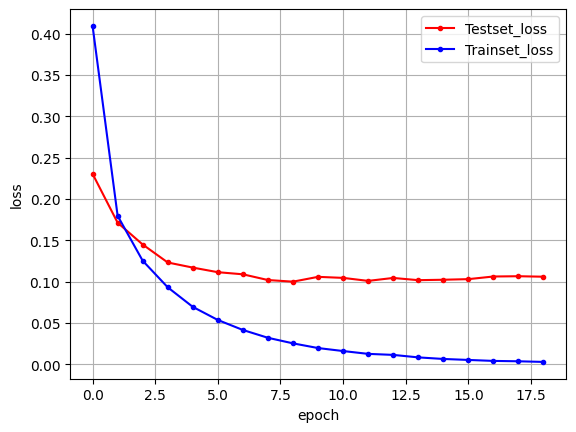

In [14]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 5. 컨볼루션 신경망 실행하기

컨볼루션 신경망에서의 테스트셋, 학습셋 분리  
* 일반적으로 2D 이미지를 1D 벡터 형태가 아닌 4D 텐서 형태로 변환  
  * 4D 텐서 구조 : (batch_size, height, width, channels)
  * batch_size : 총 데이터 수
  * height : 이미지의 높이(행)
  * width : 이미지의 너비(열)
  * channels : 이미지의 채널 수. 흑백 이미지를 사용하고 있기 때문에 채널 수는 1. 컬러 이미지를 다룬다면 채널 수는 일반적으로 3(RGB)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후 테스트셋과 학습셋으로 분리
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

컨볼루션 신경망 설정  
* kernel_size : 마스크(커널)의 크기. (행, 열) 형식으로
* input_shape: Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값. input_shape=(행, 열, 색상 또는 흑백)
* MaxPooling2D : 앞선 layer들을 거치고 나서 나온 output feature map의 모든 data가 필요하지 않다. -> parameter 줄임 -> overfitting 억제
* Dropout : 훈련 과정에서 무작위로 일부 뉴런을 비활성화시켜 과적합(Overfitting)을 방지

In [19]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# 모델의 실행 옵션을 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정
modelpath='./MINIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                    batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.05494, saving model to ./MINIST_MLP.hdf5


In [ ]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()